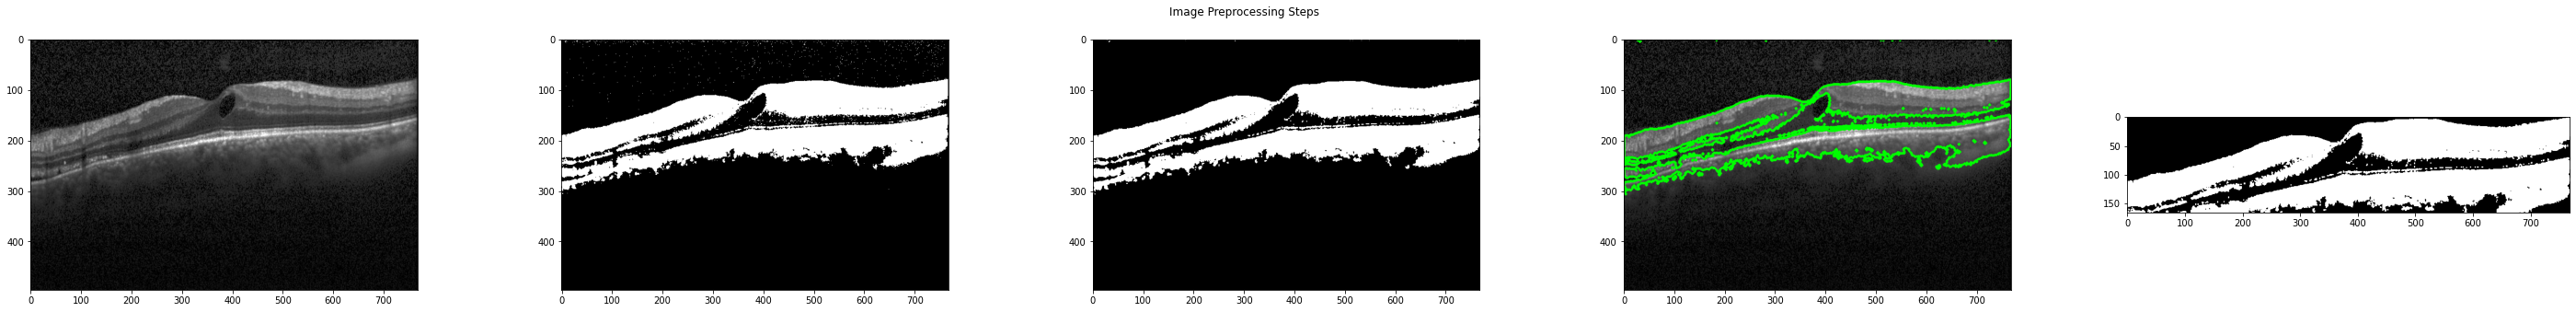

In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# load the image

image = cv2.imread("dme.jpeg")

# apply gray scale filter

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# apply threshold filter

th, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# initialize a kernel and apply morphology filter

kernel = np.ones((2, 2), np.uint8)

morphology = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# find and contour blobs

contours, hierarchy = cv2.findContours(morphology, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

contoured = image.copy()

cv2.drawContours(contoured, contours, -1, (0, 255, 0), 3)

# crop the empty boundaries from the extracted biggest blob image

biggest_blob = sorted(contours, key=cv2.contourArea, reverse=True)

for c in biggest_blob:
    x,y,w,h = cv2.boundingRect(c)
    result = morphology[y:y+h, x:x+w]
    break

# show the image

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(50, 5))
fig.suptitle('Image Preprocessing Steps')
ax5.imshow(result, cmap='gray')
ax4.imshow(contoured)
ax3.imshow(morphology, cmap='gray')
ax2.imshow(binary, cmap='gray')
ax1.imshow(image)



cv2.imshow("result", result)
cv2.imshow("contour", contoured)
cv2.imshow("morphology", morphology)
cv2.imshow("binary", binary)
cv2.imshow("original", image)

cv2.waitKey(0)
cv2.destroyAllWindows()